In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Define the web scraping function
def scrape_article_text(url):
    try:
        # Send an HTTP GET request to the URL
        response = requests.get(url)

        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # Parse the HTML content of the page using lxml parser
            soup = BeautifulSoup(response.content, 'lxml')

            # Find all div elements with class "primary-cli"
            primary_cli_divs = soup.find_all('div', class_='primary-cli')

            # Initialize a variable to store the concatenated text
            concatenated_text = ""

            # Loop through the primary-cli divs
            for div in primary_cli_divs:
                # Find all p elements within the current div
                paragraph_elements = div.find_all('p')

                div_p_a_text = ""

                # Loop through paragraph elements
                for p in paragraph_elements:
                    # Concatenate the text from this paragraph
                    div_p_a_text += p.get_text()

                # Concatenate the text from this div
                concatenated_text += div_p_a_text

            return concatenated_text
        else:
            return "Failed to retrieve the web page. Status code: " + str(response.status_code)
    except Exception as e:
        return str(e)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 83.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.3 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow_addons


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 8.3 MB/s eta 0:00:00


In [ ]:
df = pd.read_json('/content/drive/MyDrive/News_Category_Dataset_v3.json',lines=True)
df.head()

link  \
0  https://www.huffpost.com/entry/covid-boosters-...   
1  https://www.huffpost.com/entry/american-airlin...   
2  https://www.huffpost.com/entry/funniest-tweets...   
3  https://www.huffpost.com/entry/funniest-parent...   
4  https://www.huffpost.com/entry/amy-cooper-lose...   

                                            headline   category  \
0  Over 4 Million Americans Roll Up Sleeves For O...  U.S. NEWS   
1  American Airlines Flyer Charged, Banned For Li...  U.S. NEWS   
2  23 Of The Funniest Tweets About Cats And Dogs ...     COMEDY   
3  The Funniest Tweets From Parents This Week (Se...  PARENTING   
4  Woman Who Called Cops On Black Bird-Watcher Lo...  U.S. NEWS   

                                   short_description               authors  \
0  Health experts said it is too early to predict...  Carla K. Johnson, AP   
1  He was subdued by passengers and crew when he ...        Mary Papenfuss   
2  "Until you have a dog you don't understand wha...         Elyse Wanshel   
3  "Accidentally put grown-up toothpaste on my to...      Caroline Bologna   
4  Amy Cooper accused investment firm Franklin Te...        Nina Golgowski   

        date  
0 2022-09-23  
1 2022-09-23  
2 2022-09-23  
3 2022-09-23  
4 2022-09-22

In [ ]:
pd.set_option('display.max_colwidth', None)
df.sort_values(by=['date'])

link  \
209526                             https://www.huffingtonpost.com/entry/dwight-howard-rips-teammates-magic-hornets_us_5bb69b24e4b097869fd1b331   
209490                                                      https://www.huffingtonpost.com/entry/robots-play-catch_us_5baea9d4e4b014374e2d45c9   
209489                                                     https://www.huffingtonpost.com/entry/russian-cargo-ship_us_5baea9d4e4b014374e2d45bc   
209488                                       https://www.huffingtonpost.com/entry/7-amazing-name-generators-photos_us_5bacfb45e4b04234e85527ea   
209487                                            https://www.huffingtonpost.com/entry/mitt-romney-madness-florida_us_5bacfb51e4b04234e85528a3   
...                                                                                                                                        ...   
4                         https://www.huffpost.com/entry/amy-cooper-loses-discrimination-lawsuit-franklin-templeton_n_632c6463e4b09d8701bd227e   
3                                                          https://www.huffpost.com/entry/funniest-parenting-tweets_l_632d7d15e4b0d12b5403e479   
2                                          https://www.huffpost.com/entry/funniest-tweets-cats-dogs-september-17-23_n_632de332e4b0695c1d81dc02   
1       https://www.huffpost.com/entry/american-airlines-passenger-banned-flight-attendant-punch-justice-department_n_632e25d3e4b0e247890329fe   
0                                                           https://www.huffpost.com/entry/covid-boosters-uptake-us_n_632d719ee4b087fae6feaac9   

                                                                                         headline  \
209526                                   Dwight Howard Rips Teammates After Magic Loss To Hornets   
209490                        Robots Play Catch, Starring Agile Justin And Rollin' Justin (VIDEO)   
209489                                    Russian Cargo Ship Docks At International Space Station   
209488                                                         7 Amazing Name Generators (PHOTOS)   
209487                                               Mitt Romney Madness: Florida Edition (VIDEO)   
...                                                                                           ...   
4                   Woman Who Called Cops On Black Bird-Watcher Loses Lawsuit Against Ex-Employer   
3                                        The Funniest Tweets From Parents This Week (Sept. 17-23)   
2                           23 Of The Funniest Tweets About Cats And Dogs This Week (Sept. 17-23)   
1       American Airlines Flyer Charged, Banned For Life After Punching Flight Attendant On Video   
0                    Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters   

         category  \
209526     SPORTS   
209490    SCIENCE   
209489    SCIENCE   
209488     COMEDY   
209487     COMEDY   
...           ...   
4       U.S. NEWS   
3       PARENTING   
2          COMEDY   
1       U.S. NEWS   
0       U.S. NEWS   

                                                                                                                                                      short_description  \
209526                                       The five-time all-star center tore into his teammates Friday night after Orlando committed 23 turnovers en route to losing   
209490                                       image 1: throw As Hizook reports, DLR started with Rolling Justin and added "1.5 faster arms through different gear ratios   
209489                                        Gallery: Space Station's Expedition 30 Mission 50 Great Russian Rocket Launch Photos Vote Now! The Best Spaceships of All   
209488                                        Let's be honest: most of our names are pretty boring. Glenn Close? John Mayer? Barack Obama? C'mon, we can do better than   
209487                            The apparent madness that grip

In [ ]:
from tqdm.auto import tqdm
tqdm.pandas()

In [ ]:
# Apply the web scraping function to create a new 'Full_Text' column
df['full_text'] = df['link'].progress_apply(scrape_article_text)

  0%|          | 0/20000 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
df.to_json('modified_dataframe.json')

In [ ]:
!pip install tensorflow_addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 9.5 MB/s eta 0:00:00


In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 50.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 86.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import transformers
import sklearn
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import string
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import tensorflow_addons as tfa
from collections import Counter
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
!pip install --upgrade tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None


if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
else:
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

Running on TPU  grpc://10.31.96.154:8470
REPLICAS:  8


In [ ]:
df = pd.read_json('News_Category_Dataset_v3.json',lines=True)
df.head()

link  \
0  https://www.huffpost.com/entry/covid-boosters-...   
1  https://www.huffpost.com/entry/american-airlin...   
2  https://www.huffpost.com/entry/funniest-tweets...   
3  https://www.huffpost.com/entry/funniest-parent...   
4  https://www.huffpost.com/entry/amy-cooper-lose...   

                                            headline   category  \
0  Over 4 Million Americans Roll Up Sleeves For O...  U.S. NEWS   
1  American Airlines Flyer Charged, Banned For Li...  U.S. NEWS   
2  23 Of The Funniest Tweets About Cats And Dogs ...     COMEDY   
3  The Funniest Tweets From Parents This Week (Se...  PARENTING   
4  Woman Who Called Cops On Black Bird-Watcher Lo...  U.S. NEWS   

                                   short_description               authors  \
0  Health experts said it is too early to predict...  Carla K. Johnson, AP   
1  He was subdued by passengers and crew when he ...        Mary Papenfuss   
2  "Until you have a dog you don't understand wha...         Elyse Wanshel   
3  "Accidentally put grown-up toothpaste on my to...      Caroline Bologna   
4  Amy Cooper accused investment firm Franklin Te...        Nina Golgowski   

        date  
0 2022-09-23  
1 2022-09-23  
2 2022-09-23  
3 2022-09-23  
4 2022-09-22

In [ ]:
df.shape

(209527, 6)

In [ ]:
print(df.isnull().sum())

link                 0
headline             0
category             0
short_description    0
authors              0
date                 0
dtype: int64


In [ ]:
print(df.describe())

                                                     link        headline  \
count                                              209527          209527   
unique                                             209486          207996   
top     https://www.huffingtonpost.comhttps://www.wash...  Sunday Roundup   
freq                                                    2              90   
first                                                 NaN             NaN   
last                                                  NaN             NaN   

        category short_description authors                 date  
count     209527            209527  209527               209527  
unique        42            187022   29169                 3890  
top     POLITICS                            2014-03-25 00:00:00  
freq       35602             19712   37418                  100  
first        NaN               NaN     NaN  2012-01-28 00:00:00  
last         NaN               NaN     NaN  2022-09-23 00:00:00 

<ipython-input-12-d2afad36bf00>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df.describe())


In [ ]:
print('Number of Duplicates:', len(df[df.duplicated()]))

Number of Duplicates: 13


In [ ]:
df = df.drop_duplicates(keep="last")

In [ ]:
df['category'].unique()

array(['U.S. NEWS', 'COMEDY', 'PARENTING', 'WORLD NEWS', 'CULTURE & ARTS',
       'TECH', 'SPORTS', 'ENTERTAINMENT', 'POLITICS', 'WEIRD NEWS',
       'ENVIRONMENT', 'EDUCATION', 'CRIME', 'SCIENCE', 'WELLNESS',
       'BUSINESS', 'STYLE & BEAUTY', 'FOOD & DRINK', 'MEDIA',
       'QUEER VOICES', 'HOME & LIVING', 'WOMEN', 'BLACK VOICES', 'TRAVEL',
       'MONEY', 'RELIGION', 'LATINO VOICES', 'IMPACT', 'WEDDINGS',
       'COLLEGE', 'PARENTS', 'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE',
       'HEALTHY LIVING', 'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST',
       'FIFTY', 'ARTS', 'DIVORCE'], dtype=object)

In [ ]:
df['category']=df['category'].replace({"HEALTHY LIVING": "WELLNESS",
"QUEER VOICES": "GROUPS VOICES",
"BUSINESS": "BUSINESS & FINANCES",
"PARENTS": "PARENTING",
"BLACK VOICES": "GROUPS VOICES",
"THE WORLDPOST": "WORLD NEWS",
"STYLE": "STYLE & BEAUTY",
"GREEN": "ENVIRONMENT",
"TASTE": "FOOD & DRINK",
"WORLDPOST": "WORLD NEWS",
"SCIENCE": "SCIENCE & TECH",
"TECH": "SCIENCE & TECH",
"MONEY": "BUSINESS & FINANCES",
"ARTS": "ARTS & CULTURE",
"COLLEGE": "EDUCATION",
"LATINO VOICES": "GROUPS VOICES",
"CULTURE & ARTS": "ARTS & CULTURE",
"FIFTY": "MISCELLANEOUS",
"GOOD NEWS": "MISCELLANEOUS"})

In [ ]:
df['category'].unique()

array(['U.S. NEWS', 'COMEDY', 'PARENTING', 'WORLD NEWS', 'ARTS & CULTURE',
       'SCIENCE & TECH', 'SPORTS', 'ENTERTAINMENT', 'POLITICS',
       'WEIRD NEWS', 'ENVIRONMENT', 'EDUCATION', 'CRIME', 'WELLNESS',
       'BUSINESS & FINANCES', 'STYLE & BEAUTY', 'FOOD & DRINK', 'MEDIA',
       'GROUPS VOICES', 'HOME & LIVING', 'WOMEN', 'TRAVEL', 'RELIGION',
       'IMPACT', 'WEDDINGS', 'MISCELLANEOUS', 'DIVORCE'], dtype=object)

category
POLITICS               35601
WELLNESS               24636
ENTERTAINMENT          17362
PARENTING              12746
STYLE & BEAUTY         12065
GROUPS VOICES          12060
TRAVEL                  9900
WORLD NEWS              9542
FOOD & DRINK            8436
BUSINESS & FINANCES     7748
COMEDY                  5400
SPORTS                  5077
HOME & LIVING           4320
SCIENCE & TECH          4306
ENVIRONMENT             4065
ARTS & CULTURE          3922
WEDDINGS                3653
WOMEN                   3571
CRIME                   3562
IMPACT                  3484
DIVORCE                 3426
MEDIA                   2944
MISCELLANEOUS           2799
WEIRD NEWS              2777
RELIGION                2577
EDUCATION               2158
U.S. NEWS               1377
Name: headline, dtype: int64


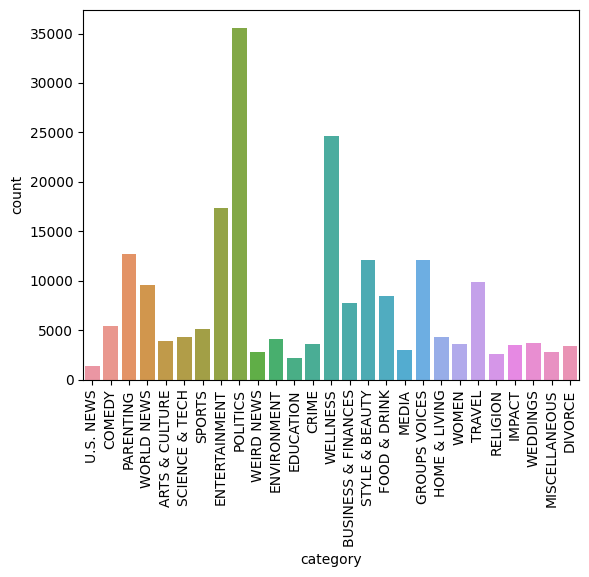

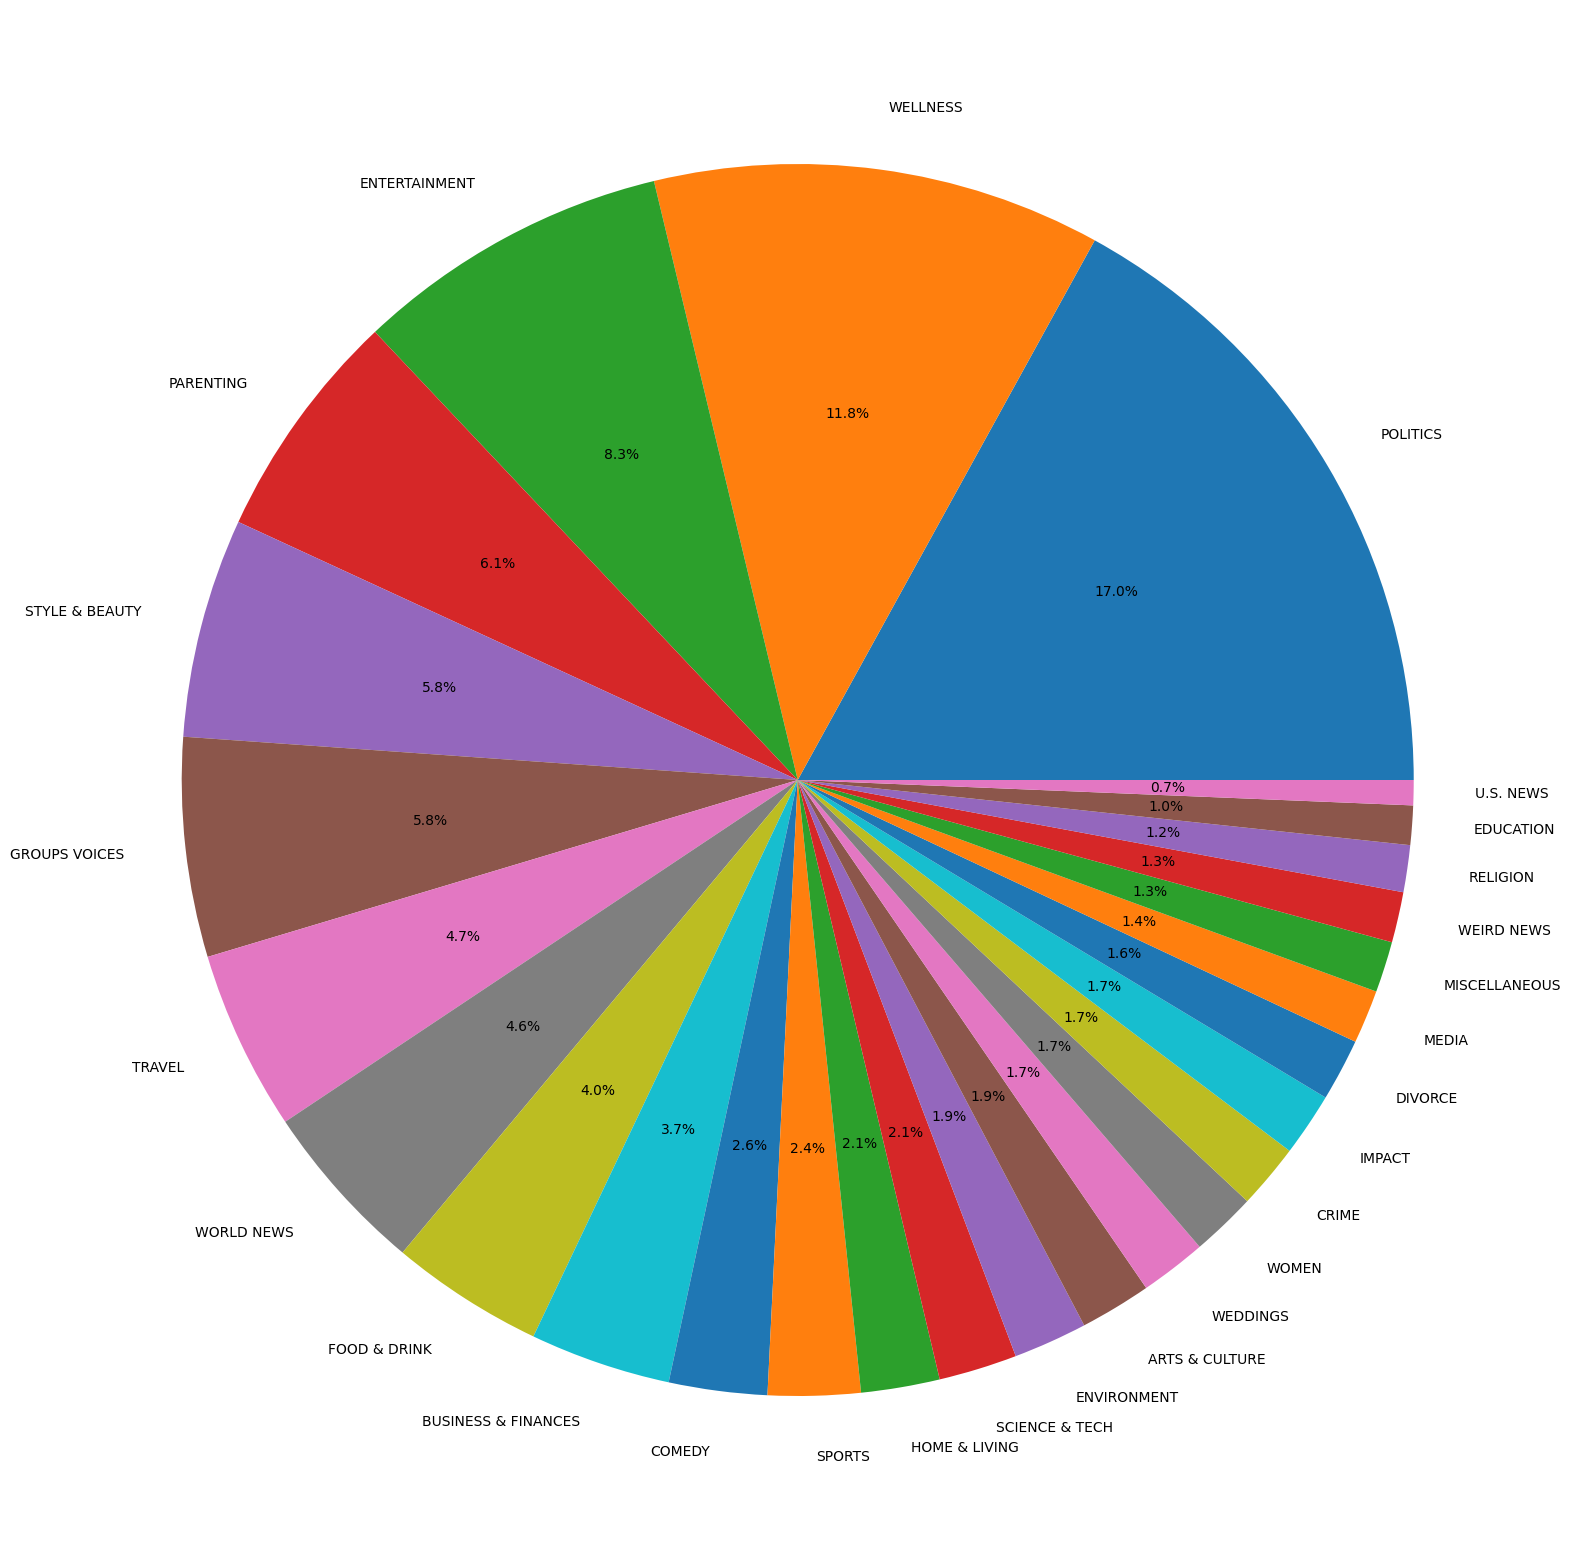

In [ ]:
print(df.groupby("category")["headline"].count().sort_values(ascending=False))

sns.countplot(x="category", data=df)
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20,20))
plt.pie(df["category"].value_counts(), labels=df["category"].value_counts().index, autopct="%1.1f%%", textprops={'fontsize': 10})
plt.show()

category
ARTS & CULTURE         59.607853
BUSINESS & FINANCES    55.826794
COMEDY                 60.841111
CRIME                  63.750702
DIVORCE                53.980736
EDUCATION              55.991196
ENTERTAINMENT          64.620781
ENVIRONMENT            58.284379
FOOD & DRINK           48.651375
GROUPS VOICES          63.257380
HOME & LIVING          61.607639
IMPACT                 55.661596
MEDIA                  62.549932
MISCELLANEOUS          56.032512
PARENTING              51.893300
POLITICS               64.250190
RELIGION               54.672875
SCIENCE & TECH         59.501161
SPORTS                 62.849714
STYLE & BEAUTY         63.146705
TRAVEL                 49.904040
U.S. NEWS              68.381990
WEDDINGS               55.697235
WEIRD NEWS             58.836874
WELLNESS               49.076717
WOMEN                  55.587511
WORLD NEWS             61.665269
Name: headline_length, dtype: float64


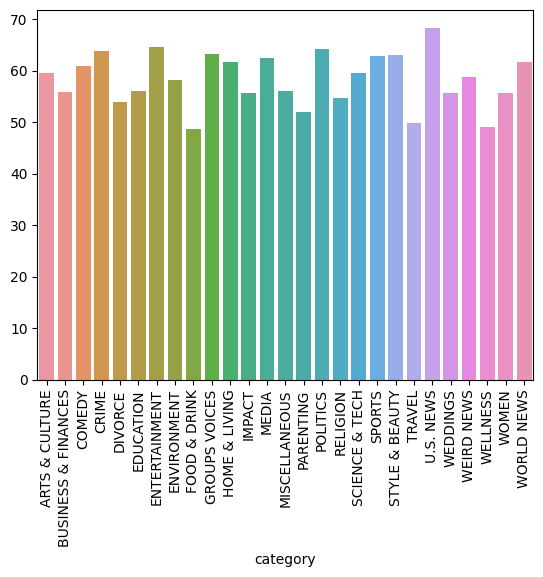

In [ ]:
df["headline_length"] = df["headline"].str.len()
print(df.groupby("category")["headline_length"].mean())
sns.barplot(x=df.groupby("category")["headline_length"].mean().index, y=df.groupby("category")["headline_length"].mean().values)
plt.xticks(rotation=90)
plt.show()

category
ARTS & CULTURE         116.201428
BUSINESS & FINANCES    137.309499
COMEDY                  71.744630
CRIME                   81.723189
DIVORCE                146.489492
EDUCATION              148.313253
ENTERTAINMENT           72.369082
ENVIRONMENT            124.053875
FOOD & DRINK            97.874585
GROUPS VOICES          105.739469
HOME & LIVING          108.789583
IMPACT                 152.384041
MEDIA                   85.970109
MISCELLANEOUS          122.163630
PARENTING              148.497803
POLITICS                96.687593
RELIGION               107.935196
SCIENCE & TECH         101.722945
SPORTS                  79.109317
STYLE & BEAUTY         110.893079
TRAVEL                 152.628384
U.S. NEWS              118.275962
WEDDINGS               146.915686
WEIRD NEWS              48.969752
WELLNESS               158.957623
WOMEN                  111.318678
WORLD NEWS             104.783588
Name: short_description_length, dtype: float64


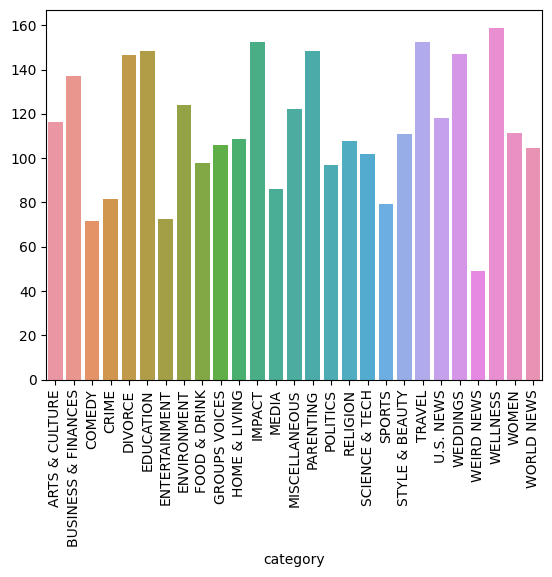

In [ ]:
df["short_description_length"] = df["short_description"].str.len()
print(df.groupby("category")["short_description_length"].mean())
sns.barplot(x=df.groupby("category")["short_description_length"].mean().index, y=df.groupby("category")["short_description_length"].mean().values)
plt.xticks(rotation=90)
plt.show()

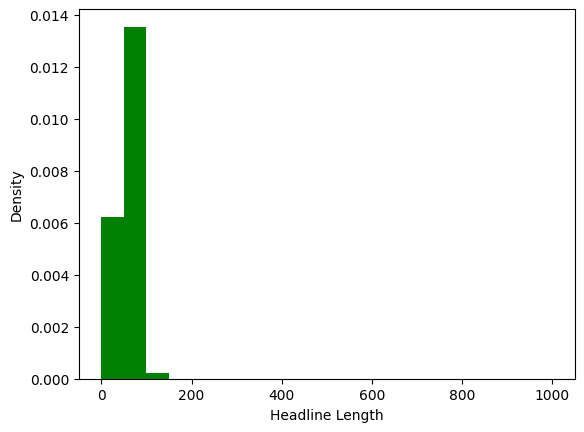

In [ ]:
plt.hist(df["headline_length"], bins=20, color="green", range=(0, 1000), density=True)
plt.xlabel("Headline Length")
plt.ylabel("Density")
plt.show()

In [ ]:
df['text'] = df['headline'] + ' ' + df['short_description']

In [ ]:
def remove_stopwords_and_punctuations(text):
    words = nltk.word_tokenize(text)  # Tokenizes the input text into individual words
    words = [lemmatizer.lemmatize(word) for word in words if word.lower() not in stop_words]  # Lemmatizes the words and removes stopwords
    words_without_punctuations = [''.join(c for c in word if c not in string.punctuation) for word in words]  # Removes punctuation from the words
    words_preprocessed = [word.replace("‘", "").replace("’", "").replace("“"," ").replace("”"," ") for word in words_without_punctuations if len(word)>2]  # Removes certain special characters and words of length 2 or less
    return ' '.join(words_preprocessed).lower()  # Joins the preprocessed words back into a single string

In [ ]:
df['text'] = df['text'].apply(remove_stopwords_and_punctuations)

In [ ]:
df

link  \
0       https://www.huffpost.com/entry/covid-boosters-...   
1       https://www.huffpost.com/entry/american-airlin...   
2       https://www.huffpost.com/entry/funniest-tweets...   
3       https://www.huffpost.com/entry/funniest-parent...   
4       https://www.huffpost.com/entry/amy-cooper-lose...   
...                                                   ...   
209522  https://www.huffingtonpost.com/entry/rim-ceo-t...   
209523  https://www.huffingtonpost.com/entry/maria-sha...   
209524  https://www.huffingtonpost.com/entry/super-bow...   
209525  https://www.huffingtonpost.com/entry/aldon-smi...   
209526  https://www.huffingtonpost.com/entry/dwight-ho...   

                                                 headline        category  \
0       Over 4 Million Americans Roll Up Sleeves For O...       U.S. NEWS   
1       American Airlines Flyer Charged, Banned For Li...       U.S. NEWS   
2       23 Of The Funniest Tweets About Cats And Dogs ...          COMEDY   
3       The Funniest Tweets From Parents This Week (Se...       PARENTING   
4       Woman Who Called Cops On Black Bird-Watcher Lo...       U.S. NEWS   
...                                                   ...             ...   
209522  RIM CEO Thorsten Heins' 'Significant' Plans Fo...  SCIENCE & TECH   
209523  Maria Sharapova Stunned By Victoria Azarenka I...          SPORTS   
209524  Giants Over Patriots, Jets Over Colts Among  M...          SPORTS   
209525  Aldon Smith Arrested: 49ers Linebacker Busted ...          SPORTS   
209526  Dwight Howard Rips Teammates After Magic Loss ...          SPORTS   

                                        short_description  \
0       Health experts said it is too early to predict...   
1       He was subdued by passengers and crew when he ...   
2       "Until you have a dog you don't understand wha...   
3       "Accidentally put grown-up toothpaste on my to...   
4       Amy Cooper accused investment firm Franklin Te...   
...                                                   ...   
209522  Verizon Wireless and AT&T are already promotin...   
209523  Afterward, Azarenka, more effusive with the pr...   
209524  Leading up to Super Bowl XLVI, the most talked...   
209525  CORRECTION: An earlier version of this story i...   
209526  The five-time all-star center tore into his te...   

                     authors       date  \
0       Carla K. Johnson, AP 2022-09-23   
1             Mary Papenfuss 2022-09-23   
2              Elyse Wanshel 2022-09-23   
3           Caroline Bologna 2022-09-23   
4             Nina Golgowski 2022-09-22   
...                      ...        ...   
209522      Reuters, Reuters 2012-01-28   
209523                       2012-01-28   
209524                       2012-01-28   
209525                       2012-01-28   
209526                       2012-01-28   

                                                     text  
0       million americans roll sleeves omicrontargeted...  
1       american airlines flyer charged banned life pu...  
2       funniest tweets cats dogs week sept 1723 dog u...  
3       funniest tweets parents week sept 1723 acciden...  
4       woman called cops black birdwatcher loses laws...  
...                                                   ...  
209522  rim ceo thorsten heins significant plans black...  
209523  maria sharapova stunned victoria azarenka aust...  
209524  giants patriots jets colts among improbable su...  
209525  aldon smith arrested 49ers linebacker busted d...  
209526  dwight howard rips teammates magic loss hornet...  

[209514 rows x 7 columns]

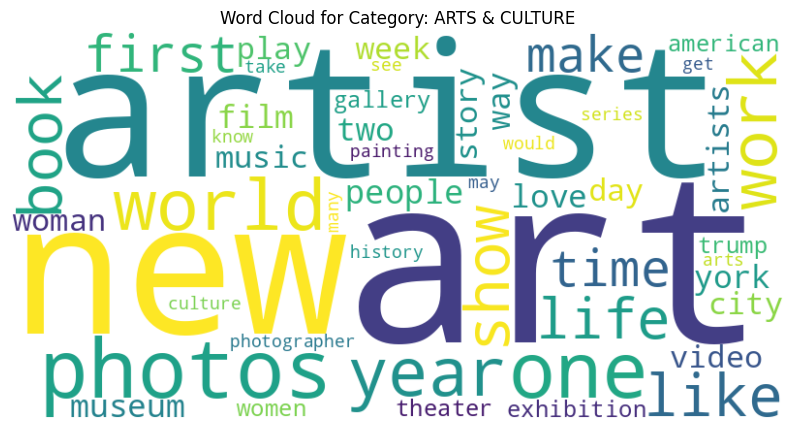

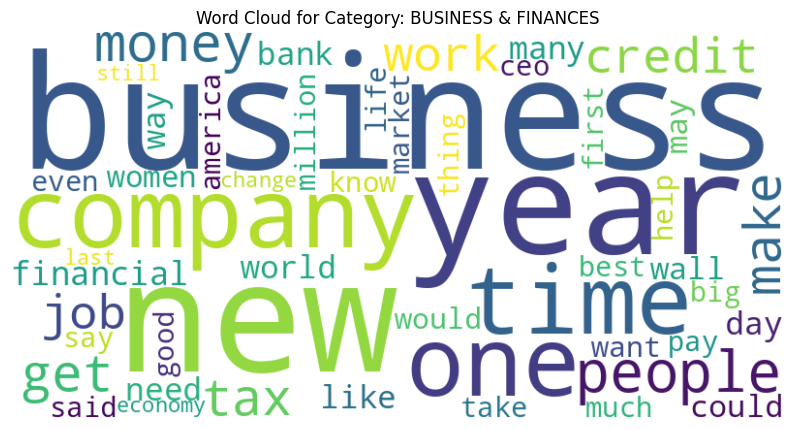

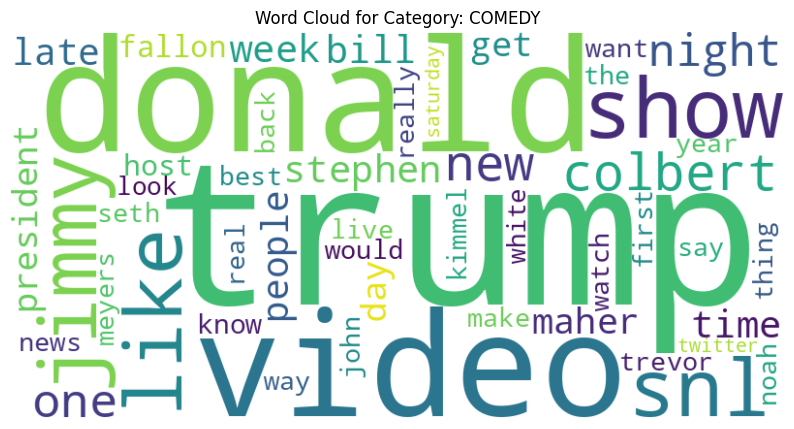

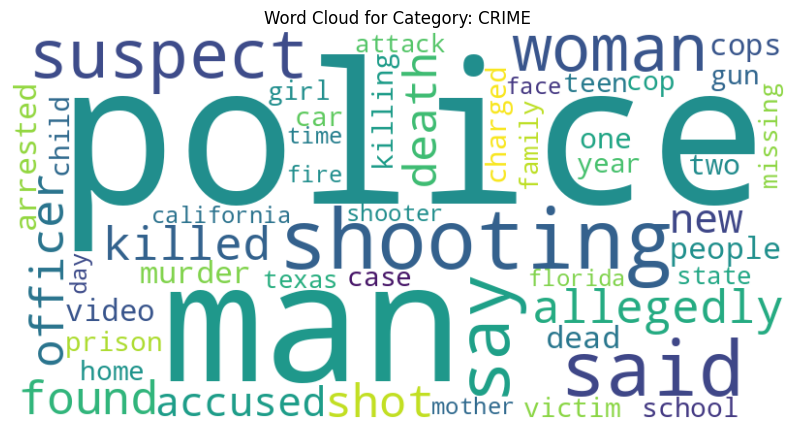

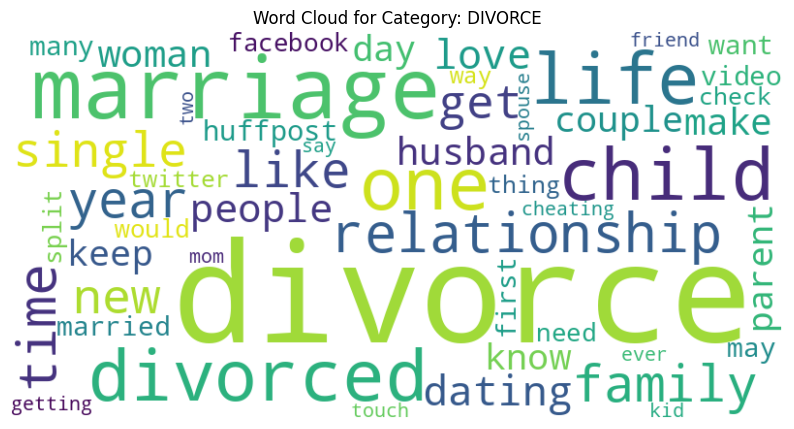

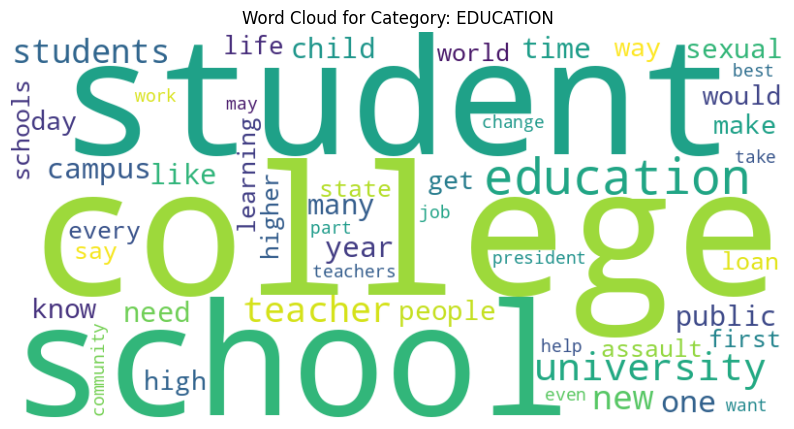

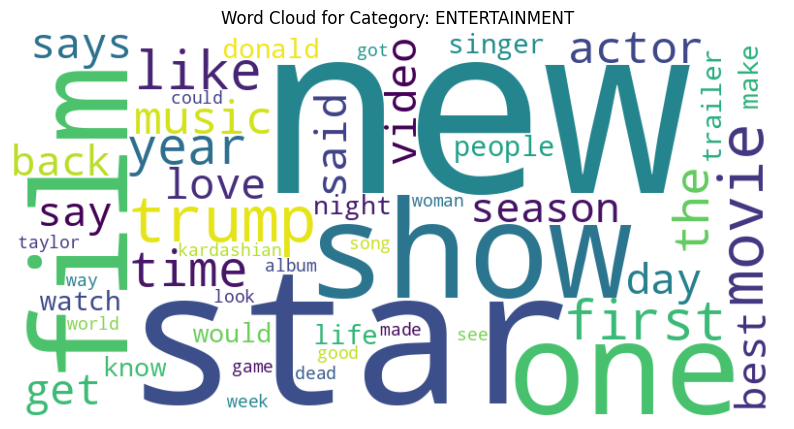

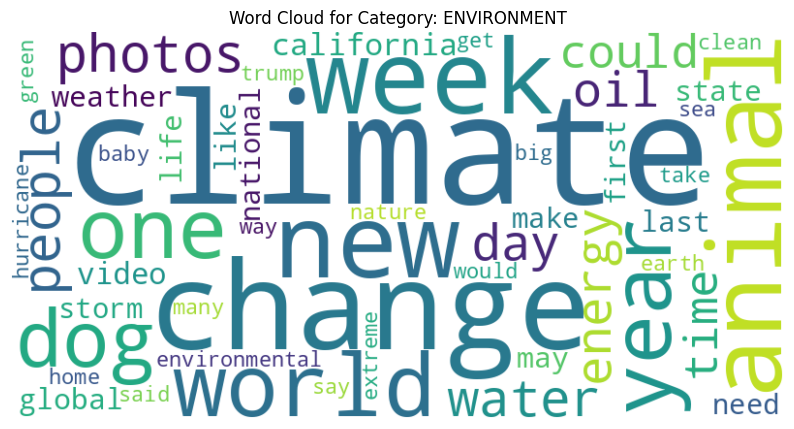

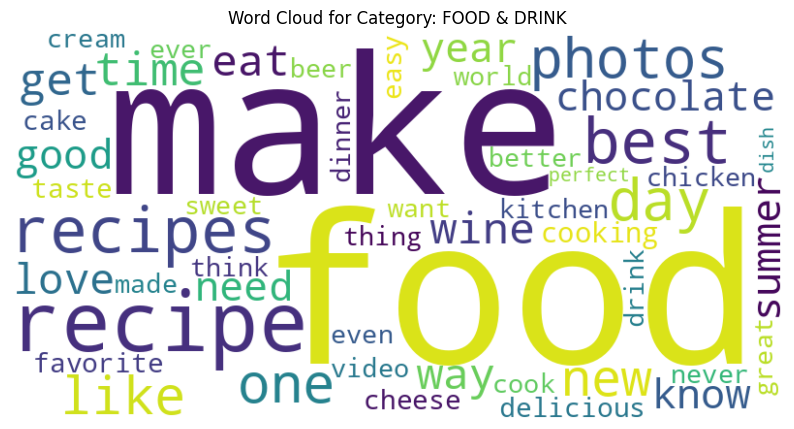

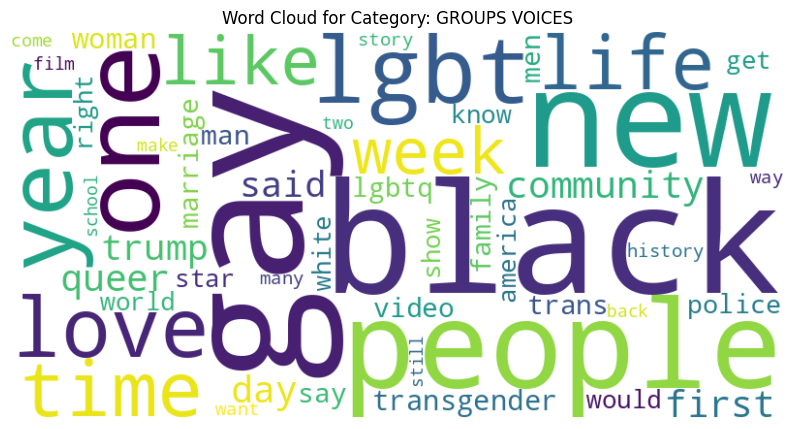

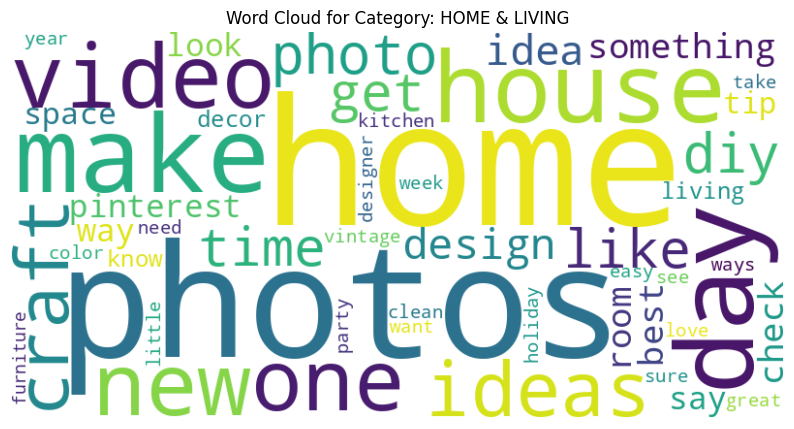

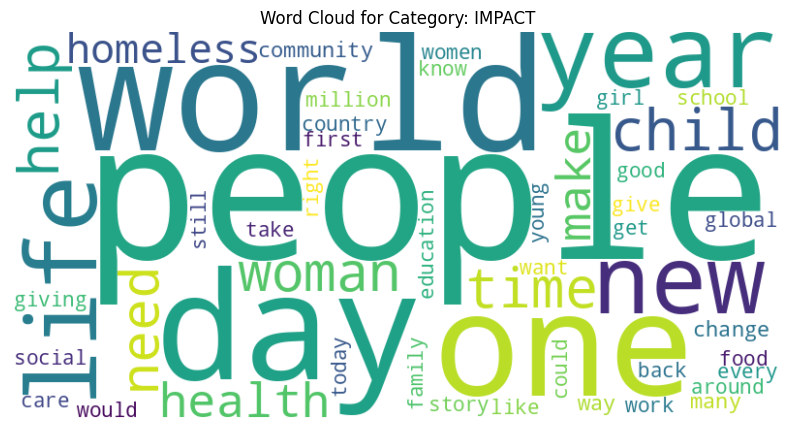

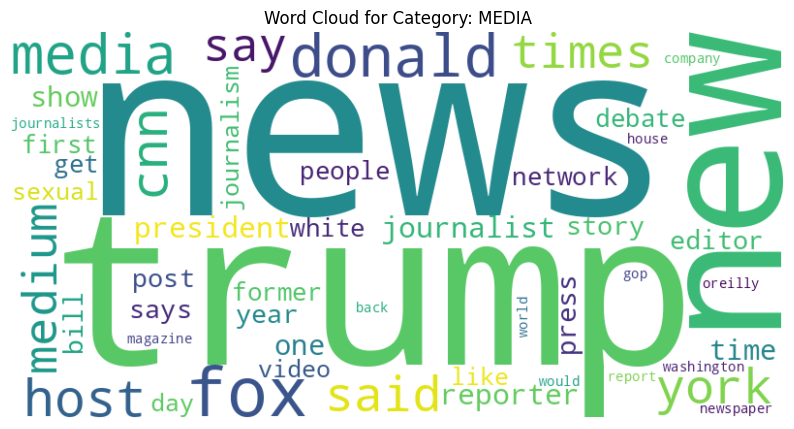

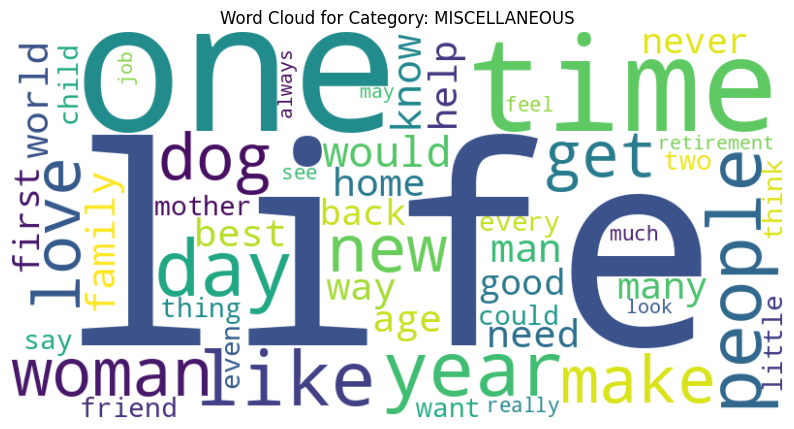

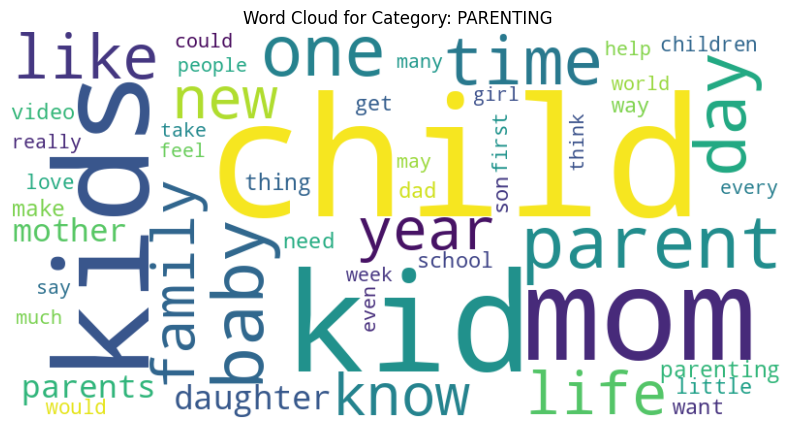

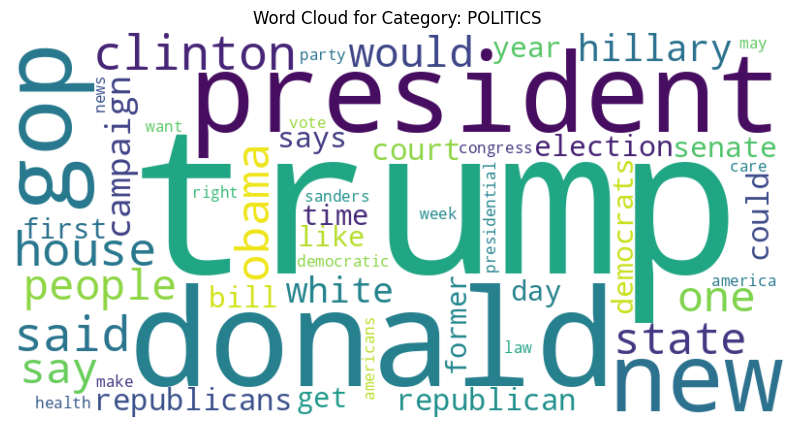

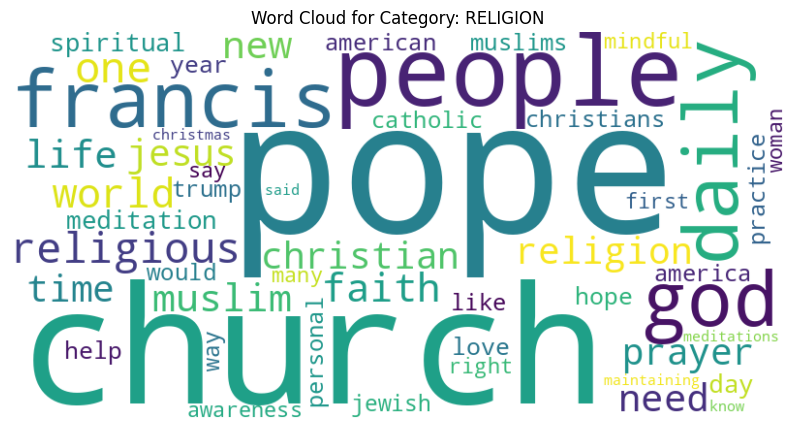

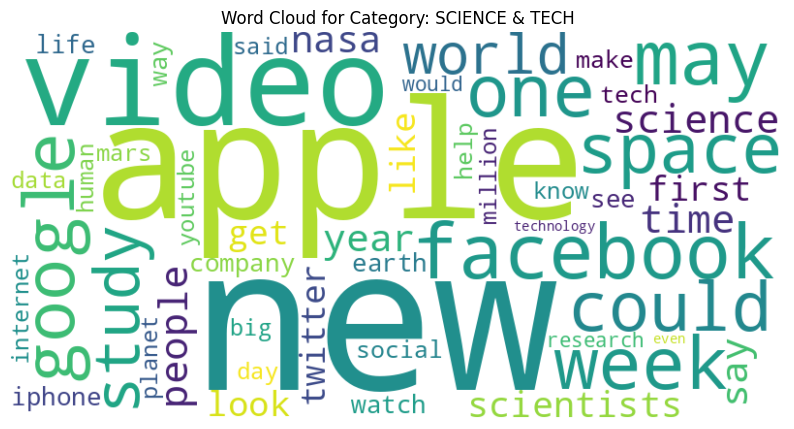

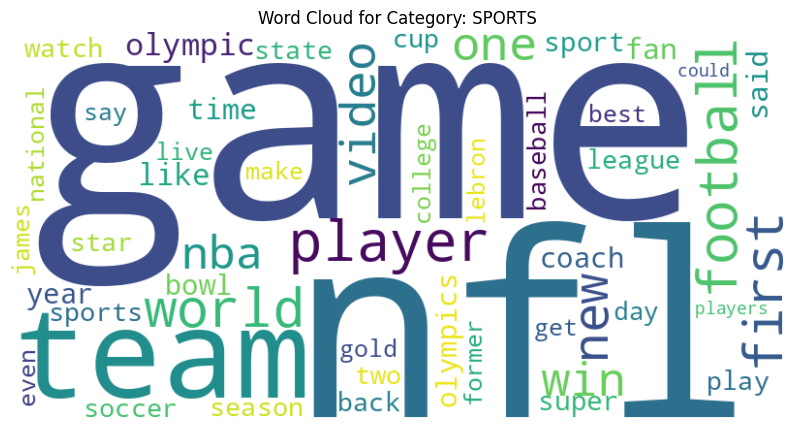

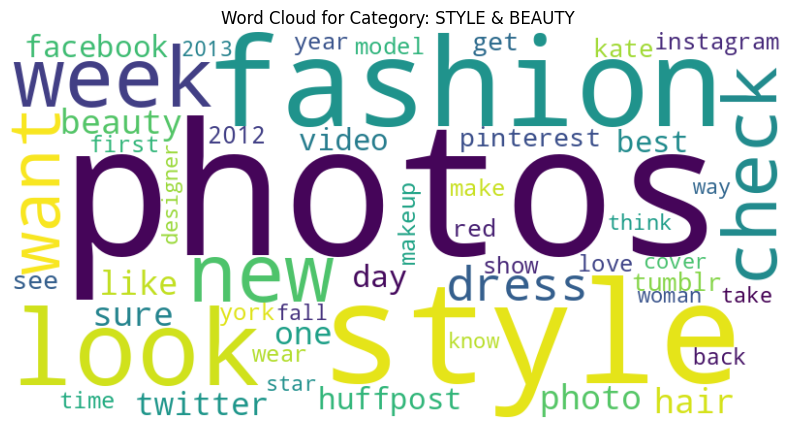

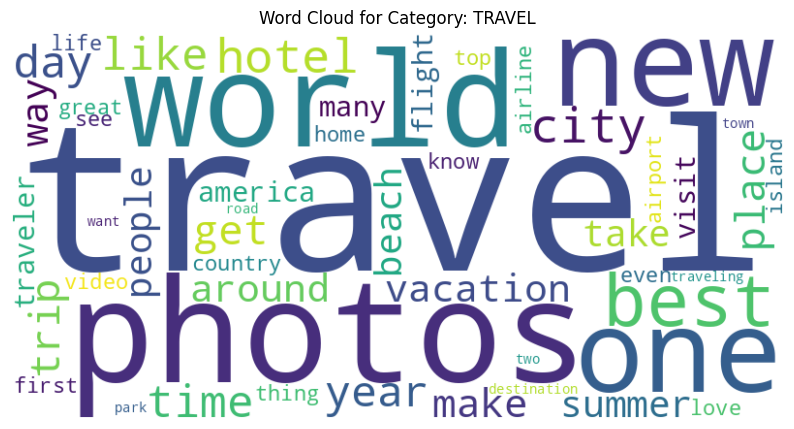

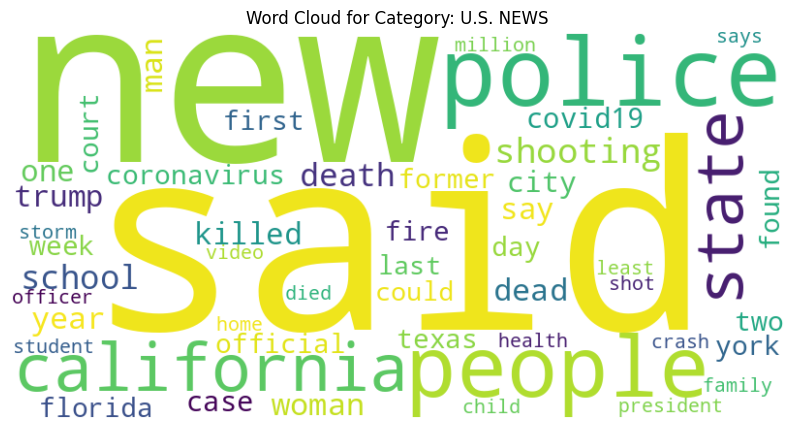

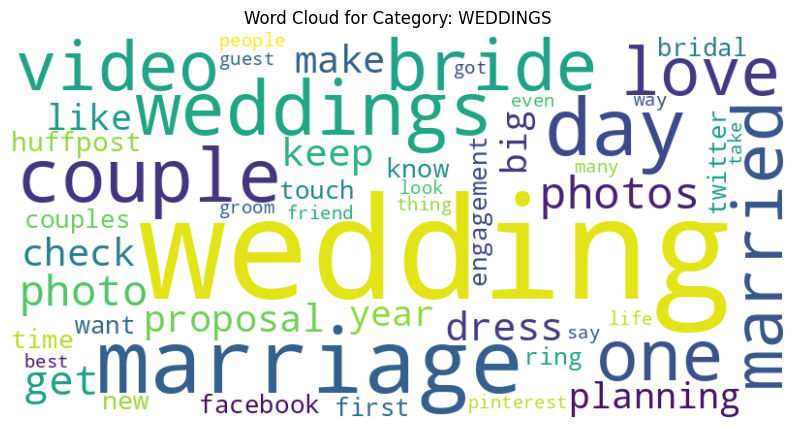

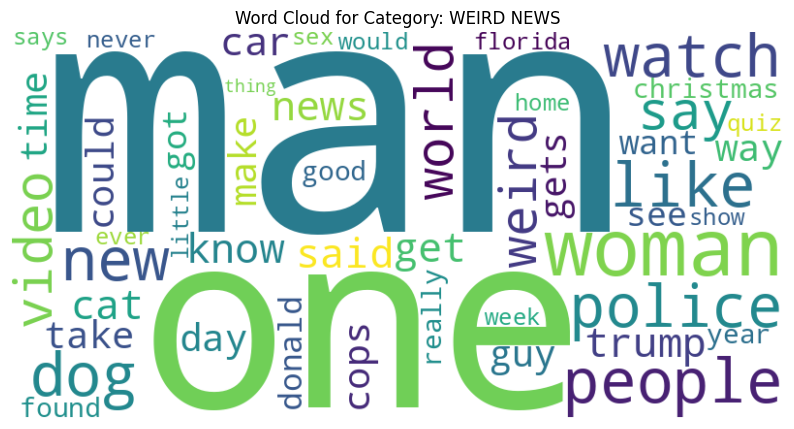

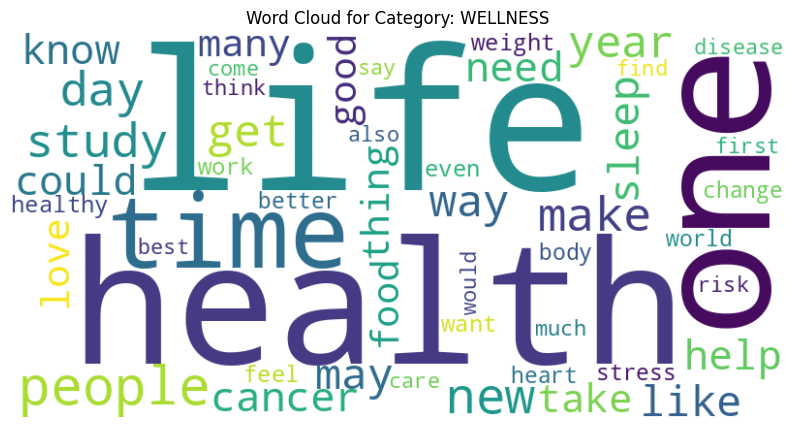

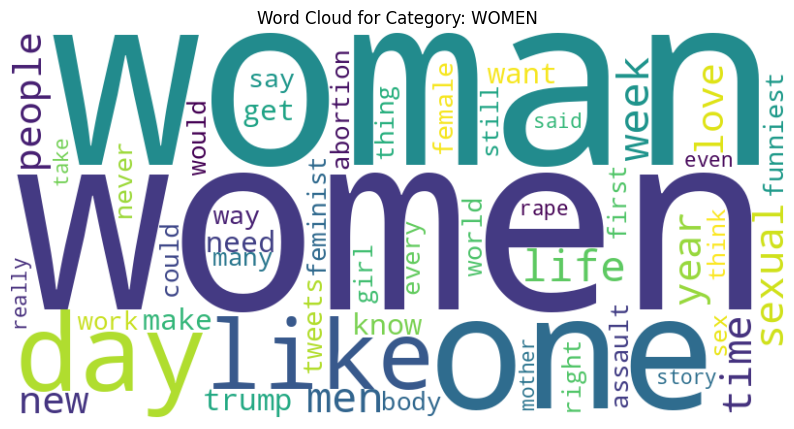

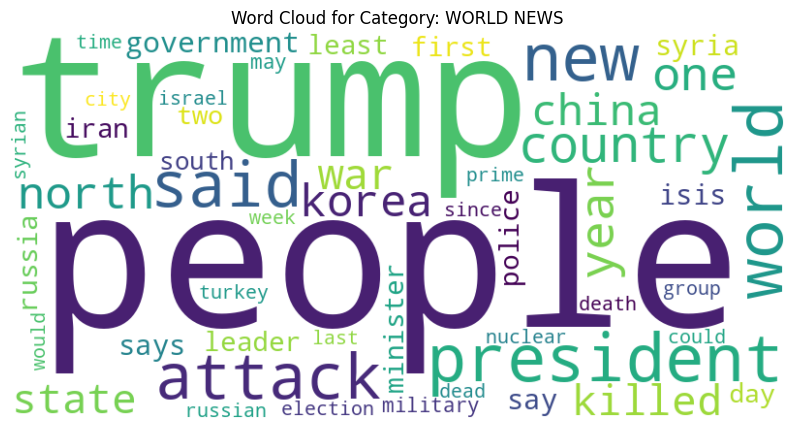

In [ ]:
def tokenize_text(text):
    return text.lower().split()

df['tokenized_text'] = df['text'].apply(tokenize_text)

def count_top_words_by_category(category_list):
    all_words = [word for words in category_list for word in words]
    word_counts = Counter(all_words)
    return word_counts.most_common(50)

top_words_by_category = df.groupby('category')['tokenized_text'].apply(count_top_words_by_category).reset_index()

for idx, row in top_words_by_category.iterrows():
    category = row['category']
    top_words = row['tokenized_text']

    word_freq_dict = dict(top_words)

    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=50, stopwords=stopwords).generate_from_frequencies(word_freq_dict)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for Category: {category}")
    plt.axis('off')
    plt.show()

In [ ]:
def count_top_words_by_category(category_list):
    all_words = [word for words in category_list for word in words]
    word_counts = Counter(all_words)
    return word_counts.most_common(10)

top_words_by_category = df.groupby('category')['tokenized_text'].apply(count_top_words_by_category).reset_index()

for idx, row in top_words_by_category.iterrows():
    category = row['category']
    top_words = row['tokenized_text']
    print(f"Category: {category}")
    print(f"Top 10 words and their count:")
    for word, count in top_words:
        print(f"{word}: {count}")
    print()

Category: ARTS & CULTURE
Top 10 words and their count:
art: 848
artist: 490
new: 484
photos: 353
one: 321
world: 295
year: 265
work: 260
show: 221
book: 212

Category: BUSINESS & FINANCES
Top 10 words and their count:
business: 881
new: 849
year: 709
company: 633
one: 632
time: 610
people: 600
money: 522
make: 492
get: 490

Category: COMEDY
Top 10 words and their count:
trump: 1298
donald: 676
video: 618
show: 470
jimmy: 422
snl: 422
like: 409
colbert: 406
new: 369
one: 347

Category: CRIME
Top 10 words and their count:
police: 866
man: 604
shooting: 413
said: 358
say: 317
suspect: 311
woman: 291
allegedly: 277
killed: 273
officer: 271

Category: DIVORCE
Top 10 words and their count:
divorce: 2470
marriage: 571
one: 403
child: 389
divorced: 377
life: 372
relationship: 358
time: 351
family: 327
year: 320

Category: EDUCATION
Top 10 words and their count:
college: 598
student: 552
school: 524
education: 461
university: 264
teacher: 218
new: 200
students: 191
one: 172
campus: 154

Categor

In [ ]:
encoder = LabelEncoder()
df['categoryEncoded'] = encoder.fit_transform(df['category'])
category_dict = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

print(category_dict)

{'ARTS & CULTURE': 0, 'BUSINESS & FINANCES': 1, 'COMEDY': 2, 'CRIME': 3, 'DIVORCE': 4, 'EDUCATION': 5, 'ENTERTAINMENT': 6, 'ENVIRONMENT': 7, 'FOOD & DRINK': 8, 'GROUPS VOICES': 9, 'HOME & LIVING': 10, 'IMPACT': 11, 'MEDIA': 12, 'MISCELLANEOUS': 13, 'PARENTING': 14, 'POLITICS': 15, 'RELIGION': 16, 'SCIENCE & TECH': 17, 'SPORTS': 18, 'STYLE & BEAUTY': 19, 'TRAVEL': 20, 'U.S. NEWS': 21, 'WEDDINGS': 22, 'WEIRD NEWS': 23, 'WELLNESS': 24, 'WOMEN': 25, 'WORLD NEWS': 26}


In [ ]:
def regular_encode(texts, tokenizer, maxlen=512):
    enc_di = tokenizer.batch_encode_plus(
        texts,
        return_token_type_ids=False,
        pad_to_max_length=True,
        max_length=maxlen
    )
    return np.array(enc_di['input_ids'])

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(df['text'], df['categoryEncoded'], random_state = 2020, test_size = 0.3)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, random_state = 2020, test_size = 0.5)

#70 15 15

In [ ]:
tokenizer = transformers.DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
# Initializes a DistilBert tokenizer with a pre-trained model
# The tokenizer returns dictionaries of input ids, attention masks, and token type ids for each text

In [ ]:
Xtrain_encoded = regular_encode(X_train.astype('str'), tokenizer, maxlen=512)
Xval_encoded = regular_encode(X_val.astype('str'), tokenizer, maxlen=512)
Xtest_encoded = regular_encode(X_test.astype('str'), tokenizer, maxlen=512)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2418: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
ytrain_encoded = tf.keras.utils.to_categorical(y_train, num_classes=27, dtype='int32')
yval_encoded = tf.keras.utils.to_categorical(y_val, num_classes=27, dtype='int32')
ytest_encoded = tf.keras.utils.to_categorical(y_test, num_classes=27, dtype='int32')

In [ ]:
def build_model(transformer, loss='categorical_crossentropy', max_len=512):
    input_word_ids = tf.keras.layers.Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")  # Input layer for the model
    sequence_output = transformer(input_word_ids)[0]  # Transformer layer that processes the input
    cls_token = sequence_output[:, 0, :]  # Extracts the [CLS] token's outputs for classification
    x = tf.keras.layers.Dropout(0.5)(cls_token)  # Dropout layer to prevent overfitting
    x = tf.keras.layers.Dense(128, activation='relu')(x)  # Dense layer with ReLU activation function
    out = tf.keras.layers.Dense(27, activation='softmax')(x)  # Output layer with softmax activation function for multi-class classification
    model = tf.keras.Model(inputs=input_word_ids, outputs=out)  # Builds the model
    optimizer = transformers.AdamWeightDecay(learning_rate=2e-5, weight_decay_rate=0.01)  # Optimizer with weight decay for regularization
    f1_score = tfa.metrics.F1Score(num_classes=27, average='macro')  # F1 score metric for multi-class classification
    model.compile(optimizer, loss=loss, metrics=[f1_score])  # Compiles the model with the specified optimizer, loss function, and metrics
    return model  # Returns the model

In [ ]:
with strategy.scope():
    transformer_layer = transformers.TFAutoModel.from_pretrained('distilbert-base-uncased')
    model = build_model(transformer_layer, max_len=512)
model.summary()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_transform.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_word_ids (InputLayer)  [(None, 512)]            0         
                                                                 
 tf_distil_bert_model (TFDis  TFBaseModelOutput(last_h  66362880 
 tilBertModel)               idden_state=(None, 512,             
                             768),                               
                              hidden_states=None, att            
                             entions=None)                       
                                                                 
 tf.__operators__.getitem (S  (None, 768)              0         
 licingOpLambda)                                                 
                                                                 
 dropout_19 (Dropout)        (None, 768)               0         
                                                             

In [ ]:
BATCH_SIZE = 32*strategy.num_replicas_in_sync  # Sets the batch size based on the number of replicas in the strategy
AUTO = tf.data.experimental.AUTOTUNE  # Constant that represents automatic tuning of performance-related options
# This constant is used to indicate that the decision for the optimal amount of resources (like the number of threads, buffer sizes etc.) to allocate for loading and preprocessing data should be left to TensorFlow.
# It dynamically adjusts these based on the system's available resources, thus improving efficiency.

train_dataset = (
    tf.data.Dataset
    .from_tensor_slices((Xtrain_encoded, ytrain_encoded))  # Creates a dataset from the training data and labels
    .repeat()  # Repeats the dataset indefinitely
    .shuffle(2048)  # Shuffles the dataset
    .batch(BATCH_SIZE)  # Batches the dataset
    .prefetch(AUTO)  # Prefetches elements from the dataset to improve performance
)

val_dataset = (
    tf.data.Dataset
    .from_tensor_slices((Xval_encoded, yval_encoded))
    .batch(BATCH_SIZE)
)

test_dataset = (
    tf.data.Dataset
    .from_tensor_slices(Xtest_encoded)
    .batch(BATCH_SIZE)
)

'\nThe tf.data.Dataset.from_tensor_slices method is a way to create a TensorFlow dataset from an array or a list of tensors.\nIt slices the input tensors along the first dimension and returns a dataset of tensor slices.\nEach slice has the same shape as the original tensor, except for the first dimension, which is reduced by one.\nFor example, if you have a tensor of shape (3, 2), the method will return a dataset of three slices, each of shape (2,).\nYou can use this method to create datasets from in-memory data that fit in memory, such as images and labels. You can also use this method to create datasets from other datasets by applying transformations.\n'

In [ ]:
n_steps = Xtrain_encoded.shape[0] // BATCH_SIZE

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('/kaggle/working/best_model_roberta.h5', save_best_only=True)

"\nEarlyStopping is a callback provided by Keras that can be used to stop the training process if the model's performance has stopped improving on a validation dataset.\nIn this case, 'patience=2' means that we will stop training if there is no improvement in the model's validation loss for 2 consecutive epochs.\n'restore_best_weights=True' means that the model weights from the epoch with the best monitored metric (in this case, validation loss) will be restored.\n\nModelCheckpoint is another callback provided by Keras that can be used to save the model at different points during training.\nIt can be configured to save the model after every epoch, only when the model improves, or at specific intervals.\nIn this case, 'save_best_only=True' means that the latest best model according to the monitored metric (in this case, validation loss) will not be overwritten.\nThe advantage of using this callback is that you can resume training from the saved models, which can be very helpful if a lon

In [ ]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)  # Learning rate scheduler callback to reduce the learning rate when the validation loss stops improving

"\nThe ReduceLROnPlateau callback is a way to reduce the learning rate when the model's performance stops improving.\nIt monitors a specified metric (in this case, 'val_loss'), and if no improvement is seen for a 'patience' number of epochs,\nthe learning rate is reduced by a factor (in this case, 0.2).\nThe learning rate will never be reduced below 'min_lr' (in this case, 1e-6).\nThis is useful in scenarios where the learning rate might be too high to allow the model to converge,\nand reducing it can help the model to continue improving.\n"

In [ ]:
train_history = model.fit(
    train_dataset,
    steps_per_epoch=n_steps,
    validation_data=val_dataset,
    epochs=30,
    callbacks=[early_stopping, model_checkpoint, lr_scheduler]
)

Epoch 1/30
572/572 [==============================] - 308s 461ms/step - loss: 1.5939 - f1_score: 0.4520 - val_loss: 1.1084 - val_f1_score: 0.5748 - lr: 2.0000e-05
Epoch 2/30
572/572 [==============================] - 257s 449ms/step - loss: 1.1035 - f1_score: 0.5804 - val_loss: 1.0345 - val_f1_score: 0.6001 - lr: 2.0000e-05
Epoch 3/30
572/572 [==============================] - 255s 446ms/step - loss: 0.9724 - f1_score: 0.6252 - val_loss: 0.9981 - val_f1_score: 0.6175 - lr: 2.0000e-05
Epoch 4/30
572/572 [==============================] - 255s 446ms/step - loss: 0.8669 - f1_score: 0.6590 - val_loss: 0.9925 - val_f1_score: 0.6230 - lr: 2.0000e-05
Epoch 5/30
572/572 [==============================] - 249s 436ms/step - loss: 0.7736 - f1_score: 0.6952 - val_loss: 1.0195 - val_f1_score: 0.6235 - lr: 2.0000e-05
Epoch 6/30
572/572 [==============================] - 268s 469ms/step - loss: 0.6826 - f1_score: 0.7294 - val_loss: 1.0347 - val_f1_score: 0.6321 - lr: 2.0000e-05


In [ ]:
from transformers import TFDistilBertModel, AdamWeightDecay
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import custom_object_scope

with custom_object_scope({'TFDistilBertModel': TFDistilBertModel, 'AdamWeightDecay': AdamWeightDecay}):
    model = load_model('/kaggle/working/best_model.h5')  # Loads the best model saved during training

preds = model.predict(test_dataset, verbose=1)
pred_classes = np.argmax(preds, axis=1)

# Calculates the metrics
print(f"Accuracy: {sklearn.metrics.accuracy_score(y_test, pred_classes)}")
print(f"Precision: {sklearn.metrics.precision_score(y_test, pred_classes, average='macro')}")
print(f"Recall: {sklearn.metrics.recall_score(y_test, pred_classes, average='macro')}")
print(f"F1-score: {sklearn.metrics.f1_score(y_test, pred_classes, average='macro')}")

123/123 [==============================] - 2589s 21s/step
Accuracy: 0.7116265750286369
Precision: 0.6377059517250472
Recall: 0.6170041217279122
F1-score: 0.6207421785483181


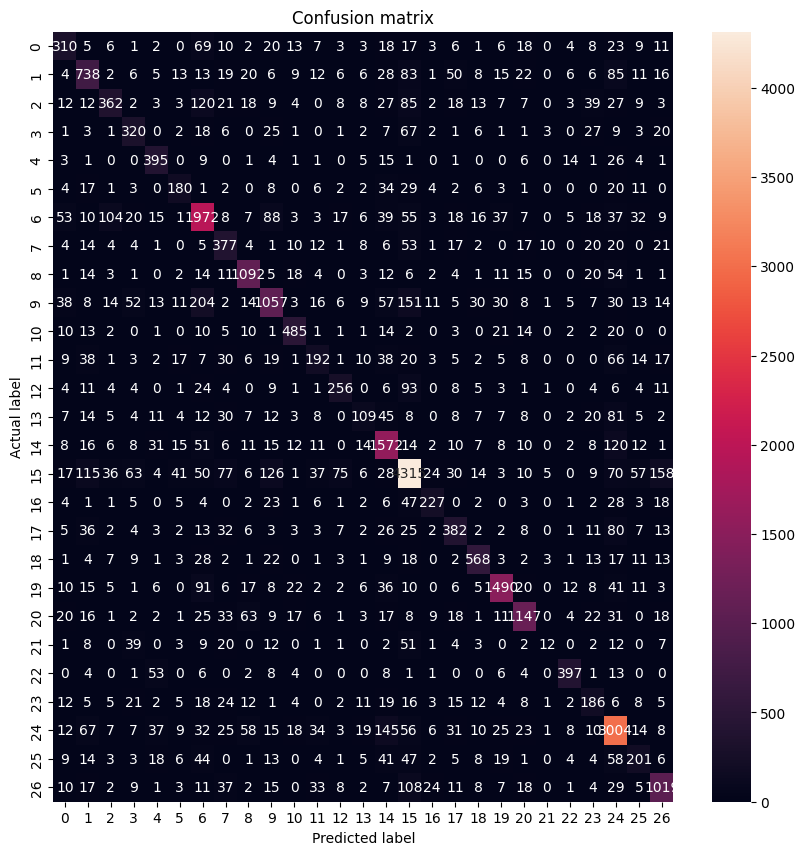

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_test, pred_classes)

# Display the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

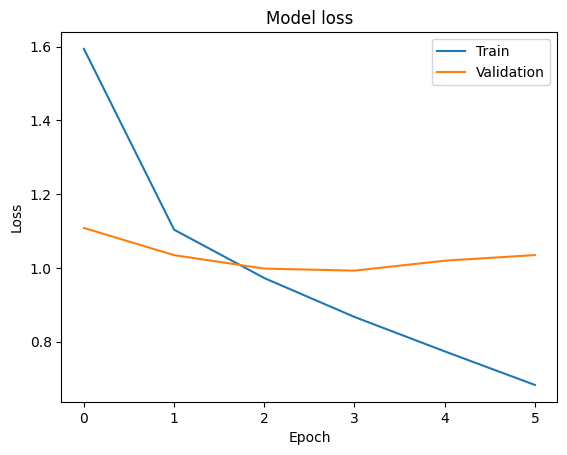

In [ ]:
# Plotting the training and validation loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
incorrect_predictions = cm.sum(axis=1) - np.diag(cm)

# Find the class with the most incorrect predictions
most_incorrect_class = np.argmax(incorrect_predictions)

print(f"The category that was predicted most incorrectly is: {encoder.inverse_transform([most_incorrect_class])[0]}")

The category that was predicted most incorrectly is: POLITICS


In [ ]:
print(f"Accuracy: {sklearn.metrics.accuracy_score(y_test, pred_classes)}")  # Prints the accuracy of the model on the test data
print(f"Precision: {sklearn.metrics.precision_score(y_test, pred_classes, average='micro')}")
print(f"Recall: {sklearn.metrics.recall_score(y_test, pred_classes, average='micro')}")
print(f"F1-score: {sklearn.metrics.f1_score(y_test, pred_classes, average='micro')}")

Accuracy: 0.7116265750286369
Precision: 0.7116265750286369
Recall: 0.7116265750286369
F1-score: 0.7116265750286368


In [ ]:
print(f"Accuracy: {sklearn.metrics.accuracy_score(y_test, pred_classes)}")  # Prints the accuracy of the model on the test data
print(f"Precision: {sklearn.metrics.precision_score(y_test, pred_classes, average='weighted')}")
print(f"Recall: {sklearn.metrics.recall_score(y_test, pred_classes, average='weighted')}")
print(f"F1-score: {sklearn.metrics.f1_score(y_test, pred_classes, average='weighted')}")

Accuracy: 0.7116265750286369
Precision: 0.7087154312020878
Recall: 0.7116265750286369
F1-score: 0.7074023911571213


In [ ]:
from transformers import RobertaTokenizer

In [ ]:
roberta_tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

In [ ]:
Xtrain_encoded_roberta = regular_encode(X_train.astype('str'), roberta_tokenizer, maxlen=512)
Xval_encoded_roberta = regular_encode(X_val.astype('str'), roberta_tokenizer, maxlen=512)
Xtest_encoded_roberta = regular_encode(X_test.astype('str'), roberta_tokenizer, maxlen=512)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2418: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
Xtrain_encoded_roberta

array([[    0,   534, 44667, ...,     1,     1,     1],
       [    0,  9685, 39150, ...,     1,     1,     1],
       [    0, 31253,   248, ...,     1,     1,     1],
       ...,
       [    0, 46093, 11351, ...,     1,     1,     1],
       [    0, 33282,  1671, ...,     1,     1,     1],
       [    0, 43070,  9138, ...,     1,     1,     1]])

In [ ]:
BATCH_SIZE = 32*strategy.num_replicas_in_sync
AUTO = tf.data.experimental.AUTOTUNE

train_dataset_roberta = (
    tf.data.Dataset
    .from_tensor_slices((Xtrain_encoded_roberta, ytrain_encoded))
    .repeat()
    .shuffle(2048)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

val_dataset_roberta = (
    tf.data.Dataset
    .from_tensor_slices((Xval_encoded_roberta, yval_encoded))
    .batch(BATCH_SIZE)
)

test_dataset_roberta = (
    tf.data.Dataset
    .from_tensor_slices(Xtest_encoded_roberta)
    .batch(BATCH_SIZE)
)

'\nThe tf.data.Dataset.from_tensor_slices method is a way to create a TensorFlow dataset from an array or a list of tensors.\nIt slices the input tensors along the first dimension and returns a dataset of tensor slices.\nEach slice has the same shape as the original tensor, except for the first dimension, which is reduced by one.\nFor example, if you have a tensor of shape (3, 2), the method will return a dataset of three slices, each of shape (2,).\nYou can use this method to create datasets from in-memory data that fit in memory, such as images and labels. You can also use this method to create datasets from other datasets by applying transformations.\n'

In [ ]:
with strategy.scope():
    transformer_layer = transformers.TFAutoModel.from_pretrained('roberta-base')
    model2 = build_model(transformer_layer, max_len=512)
model2.summary()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['roberta.embeddings.position_ids', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_word_ids (InputLayer)  [(None, 512)]            0         
                                                                 
 tf_roberta_model_1 (TFRober  TFBaseModelOutputWithPoo  124645632
 taModel)                    lingAndCrossAttentions(l            
                             ast_hidden_state=(None,             
                             512, 768),                          
                              pooler_output=(None, 76            
                             8),                                 
                              past_key_values=None, h            
                             idden_states=None, atten            
                             tions=None, cross_attent            
                             ions=None)                          
                                                             

In [ ]:
n_steps = Xtrain_encoded_roberta.shape[0] // BATCH_SIZE

In [ ]:
train_history_roberta = model2.fit(
    train_dataset_roberta,
    steps_per_epoch=n_steps,
    validation_data=val_dataset_roberta,
    epochs=30,
    callbacks=[early_stopping, model_checkpoint, lr_scheduler]
)

Epoch 1/30


572/572 [==============================] - 659s 1s/step - loss: 1.9606 - f1_score: 0.3280 - val_loss: 1.2949 - val_f1_score: 0.5118 - lr: 2.0000e-05
Epoch 2/30
572/572 [==============================] - 569s 996ms/step - loss: 1.2956 - f1_score: 0.5223 - val_loss: 1.1657 - val_f1_score: 0.5614 - lr: 2.0000e-05
Epoch 3/30
572/572 [==============================] - 575s 1s/step - loss: 1.1558 - f1_score: 0.5681 - val_loss: 1.1079 - val_f1_score: 0.5864 - lr: 2.0000e-05
Epoch 4/30
572/572 [==============================] - 571s 998ms/step - loss: 1.0632 - f1_score: 0.5962 - val_loss: 1.0765 - val_f1_score: 0.5973 - lr: 2.0000e-05
Epoch 5/30
572/572 [==============================] - 571s 998ms/step - loss: 0.9858 - f1_score: 0.6219 - val_loss: 1.0703 - val_f1_score: 0.6046 - lr: 2.0000e-05
Epoch 6/30
572/572 [==============================] - 562s 982ms/step - loss: 0.9203 - f1_score: 0.6442 - val_loss: 1.0747 - val_f1_score: 0.6047 - lr: 2.0000e-05
Epoch 7/30
572/572 [===================

In [ ]:
from transformers import TFRobertaModel, AdamWeightDecay
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import custom_object_scope

with custom_object_scope({'TFRobertaModel': TFRobertaModel, 'AdamWeightDecay': AdamWeightDecay}):
    model = load_model('/kaggle/working/best_model_roberta.h5')

preds = model.predict(test_dataset_roberta, verbose=1)
pred_classes = np.argmax(preds, axis=1)

# Calculates the metrics
print(f"Accuracy: {sklearn.metrics.accuracy_score(y_test, pred_classes)}")  # Prints the accuracy of the model
print(f"Precision: {sklearn.metrics.precision_score(y_test, pred_classes, average='macro')}")
print(f"Recall: {sklearn.metrics.recall_score(y_test, pred_classes, average='macro')}")
print(f"F1-score: {sklearn.metrics.f1_score(y_test, pred_classes, average='macro')}")

123/123 [==============================] - 5322s 44s/step
Accuracy: 0.6948262695685377
Precision: 0.6101954592063529
Recall: 0.5961544651191633
F1-score: 0.597893904079496


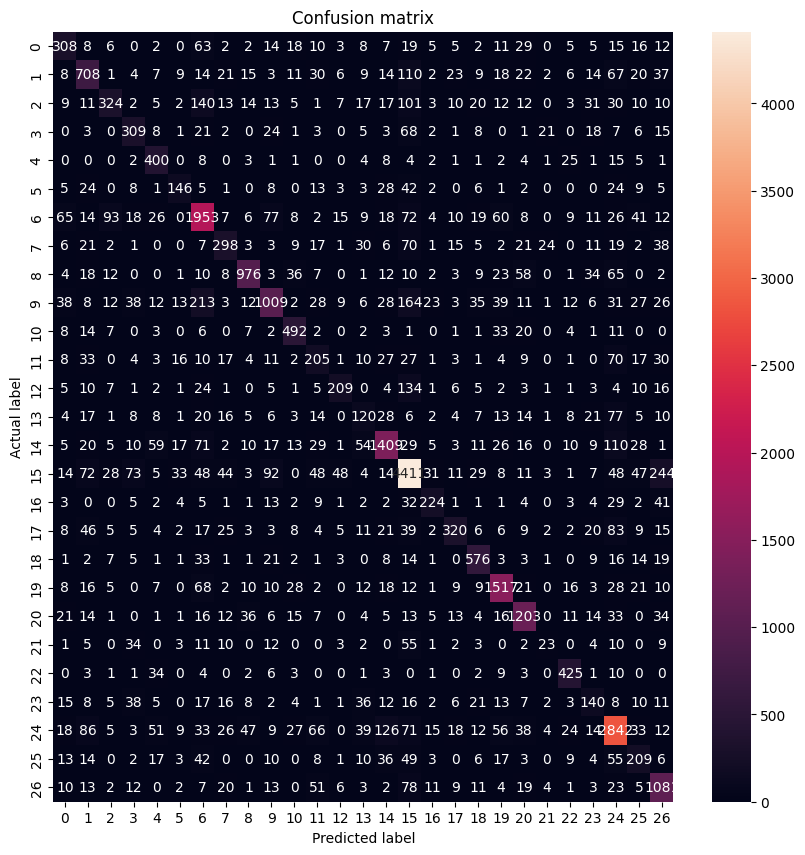

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_test, pred_classes)

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

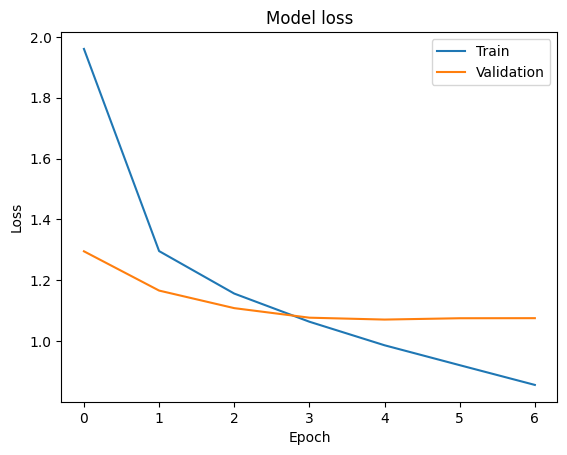

In [ ]:
# Plotting the training and validation loss
plt.plot(train_history_roberta.history['loss'])
plt.plot(train_history_roberta.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

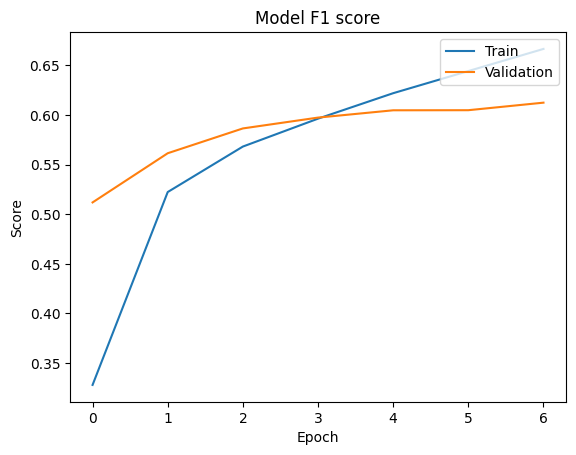

In [ ]:
# Plotting the training and validation loss
plt.plot(train_history_roberta.history['f1_score'])
plt.plot(train_history_roberta.history['val_f1_score'])
plt.title('Model F1 score')
plt.ylabel('Score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
incorrect_predictions = cm.sum(axis=1) - np.diag(cm)

# Find the class with the most incorrect predictions
most_incorrect_class = np.argmax(incorrect_predictions)

print(f"The category that was predicted most incorrectly is: {encoder.inverse_transform([most_incorrect_class])[0]}")

The category that was predicted most incorrectly is: POLITICS


In [ ]:

!pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.0 MB/s eta 0:00:00


In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 101.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.0 MB/s eta 0:00:00


In [ ]:
from transformers import AlbertTokenizer

In [ ]:
albert_tokenizer = AlbertTokenizer.from_pretrained("albert-base-v1")

In [ ]:
Xtrain_encoded_albert = regular_encode(X_train.astype('str'), albert_tokenizer, maxlen=512)
Xval_encoded_albert = regular_encode(X_val.astype('str'), albert_tokenizer, maxlen=512)
Xtest_encoded_albert = regular_encode(X_test.astype('str'), albert_tokenizer, maxlen=512)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2418: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
ytrain_encoded = tf.keras.utils.to_categorical(y_train, num_classes=27, dtype='int32')
yval_encoded = tf.keras.utils.to_categorical(y_val, num_classes=27, dtype='int32')
ytest_encoded = tf.keras.utils.to_categorical(y_test, num_classes=27, dtype='int32')

In [ ]:
with strategy.scope():
    transformer_layer = transformers.TFAutoModel.from_pretrained('albert-base-v1')
    model3 = build_model(transformer_layer, max_len=512)
model3.summary()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFAlbertModel: ['predictions.LayerNorm.bias', 'predictions.dense.weight', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.bias', 'predictions.bias']
- This IS expected if you are initializing TFAlbertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFAlbertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFAlbertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFAlbertModel for predictions without further training.


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_word_ids (InputLayer)  [(None, 512)]            0         
                                                                 
 tf_albert_model_1 (TFAlbert  TFBaseModelOutputWithPoo  11683584 
 Model)                      ling(last_hidden_state=(            
                             None, 512, 768),                    
                              pooler_output=(None, 76            
                             8),                                 
                              hidden_states=None, att            
                             entions=None)                       
                                                                 
 tf.__operators__.getitem_1   (None, 768)              0         
 (SlicingOpLambda)                                               
                                                           

In [ ]:
BATCH_SIZE = 32*strategy.num_replicas_in_sync
AUTO = tf.data.experimental.AUTOTUNE

train_dataset_albert = (
    tf.data.Dataset
    .from_tensor_slices((Xtrain_encoded_albert, ytrain_encoded))
    .repeat()
    .shuffle(2048)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

val_dataset_albert = (
    tf.data.Dataset
    .from_tensor_slices((Xval_encoded_albert, yval_encoded))
    .batch(BATCH_SIZE)
)

test_dataset_albert = (
    tf.data.Dataset
    .from_tensor_slices(Xtest_encoded_albert)
    .batch(BATCH_SIZE)
)

'\nThe tf.data.Dataset.from_tensor_slices method is a way to create a TensorFlow dataset from an array or a list of tensors.\nIt slices the input tensors along the first dimension and returns a dataset of tensor slices.\nEach slice has the same shape as the original tensor, except for the first dimension, which is reduced by one.\nFor example, if you have a tensor of shape (3, 2), the method will return a dataset of three slices, each of shape (2,).\nYou can use this method to create datasets from in-memory data that fit in memory, such as images and labels. You can also use this method to create datasets from other datasets by applying transformations.\n'

In [ ]:
n_steps = Xtrain_encoded_albert.shape[0] // BATCH_SIZE

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('/kaggle/working/best_model_albert.h5', save_best_only=True)

"\nEarlyStopping is a callback provided by Keras that can be used to stop the training process if the model's performance has stopped improving on a validation dataset.\nIn this case, 'patience=2' means that we will stop training if there is no improvement in the model's validation loss for 2 consecutive epochs.\n'restore_best_weights=True' means that the model weights from the epoch with the best monitored metric (in this case, validation loss) will be restored.\n\nModelCheckpoint is another callback provided by Keras that can be used to save the model at different points during training.\nIt can be configured to save the model after every epoch, only when the model improves, or at specific intervals.\nIn this case, 'save_best_only=True' means that the latest best model according to the monitored metric (in this case, validation loss) will not be overwritten.\nThe advantage of using this callback is that you can resume training from the saved models, which can be very helpful if a lon

In [ ]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)

"\nThe ReduceLROnPlateau callback is a way to reduce the learning rate when the model's performance stops improving.\nIt monitors a specified metric (in this case, 'val_loss'), and if no improvement is seen for a 'patience' number of epochs,\nthe learning rate is reduced by a factor (in this case, 0.2).\nThe learning rate will never be reduced below 'min_lr' (in this case, 1e-6).\nThis is useful in scenarios where the learning rate might be too high to allow the model to converge,\nand reducing it can help the model to continue improving.\n"

In [ ]:
train_history_albert = model3.fit(
    train_dataset_albert,
    steps_per_epoch=n_steps,
    validation_data=val_dataset_albert,
    epochs=30,  # Number of epochs to train for
    callbacks=[early_stopping, model_checkpoint, lr_scheduler]
)

Epoch 1/30


572/572 [==============================] - 570s 933ms/step - loss: 2.2424 - f1_score: 0.2634 - val_loss: 1.3722 - val_f1_score: 0.4910 - lr: 2.0000e-05
Epoch 2/30
572/572 [==============================] - 518s 906ms/step - loss: 1.3884 - f1_score: 0.4996 - val_loss: 1.2176 - val_f1_score: 0.5465 - lr: 2.0000e-05
Epoch 3/30
572/572 [==============================] - 518s 905ms/step - loss: 1.2486 - f1_score: 0.5442 - val_loss: 1.1722 - val_f1_score: 0.5649 - lr: 2.0000e-05
Epoch 4/30
572/572 [==============================] - 518s 905ms/step - loss: 1.1650 - f1_score: 0.5688 - val_loss: 1.1254 - val_f1_score: 0.5774 - lr: 2.0000e-05
Epoch 5/30
572/572 [==============================] - 518s 905ms/step - loss: 1.1019 - f1_score: 0.5880 - val_loss: 1.0840 - val_f1_score: 0.5925 - lr: 2.0000e-05
Epoch 6/30
572/572 [==============================] - 518s 905ms/step - loss: 1.0454 - f1_score: 0.6043 - val_loss: 1.0778 - val_f1_score: 0.5970 - lr: 2.0000e-05
Epoch 7/30
572/572 [=============

In [ ]:
from transformers import TFAlbertModel, AdamWeightDecay
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import custom_object_scope

with custom_object_scope({'TFAlbertModel': TFAlbertModel, 'AdamWeightDecay': AdamWeightDecay}):
    model = load_model('/kaggle/working/best_model_albert.h5')  # Loads the best model saved during training

preds = model.predict(test_dataset_albert, verbose=1)
pred_classes = np.argmax(preds, axis=1)

# Calculates the metrics
print(f"Accuracy: {sklearn.metrics.accuracy_score(y_test, pred_classes)}")  # Prints the accuracy of the model
print(f"Precision: {sklearn.metrics.precision_score(y_test, pred_classes, average='macro')}")
print(f"Recall: {sklearn.metrics.recall_score(y_test, pred_classes, average='macro')}")
print(f"F1-score: {sklearn.metrics.f1_score(y_test, pred_classes, average='macro')}")

123/123 [==============================] - 5414s 44s/step
Accuracy: 0.7005854651902762
Precision: 0.6352516065199606
Recall: 0.596620234889013
F1-score: 0.6092398353497238


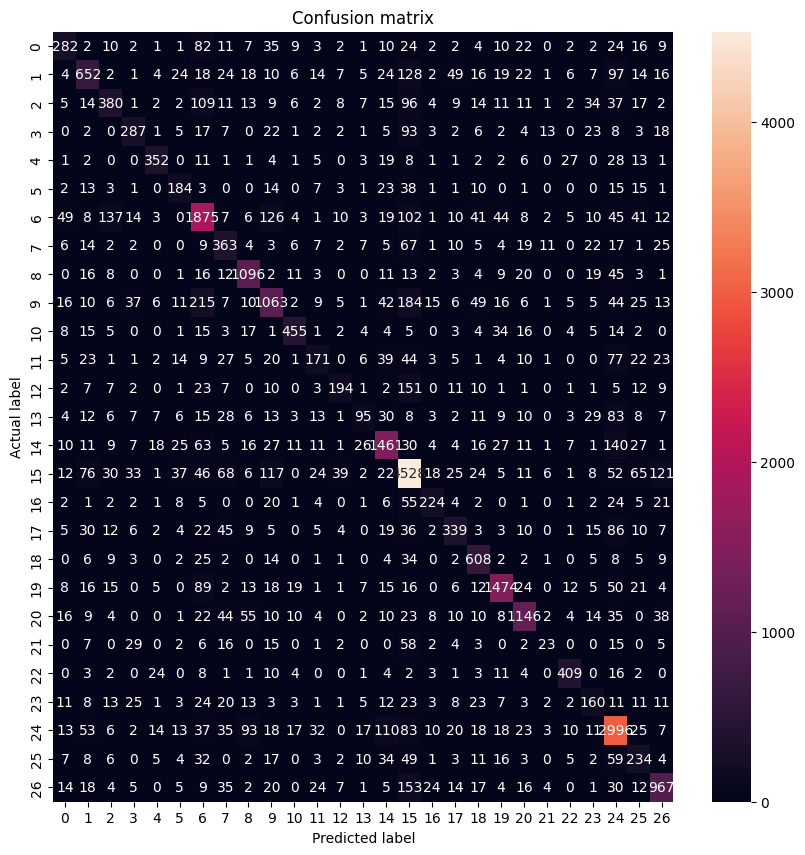

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_test, pred_classes)

# Display the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

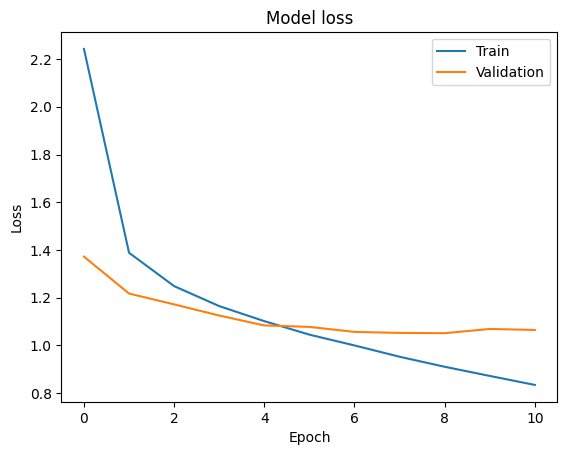

In [ ]:
# Plotting the training and validation loss
plt.plot(train_history_albert.history['loss'])
plt.plot(train_history_albert.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

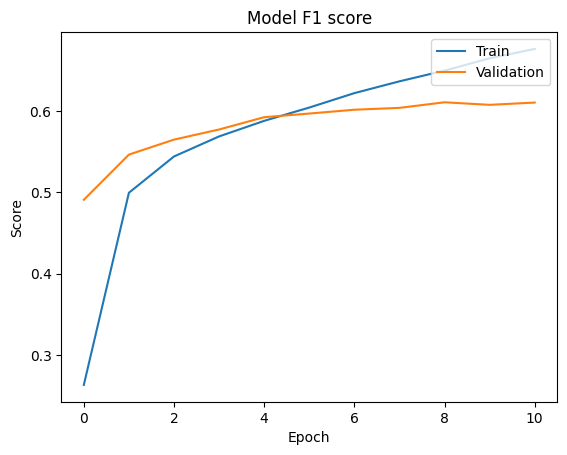

In [ ]:
# Plotting the training and validation loss
plt.plot(train_history_albert.history['f1_score'])
plt.plot(train_history_albert.history['val_f1_score'])
plt.title('Model F1 score')
plt.ylabel('Score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
incorrect_predictions = cm.sum(axis=1) - np.diag(cm)

# Find the class with the most incorrect predictions
most_incorrect_class = np.argmax(incorrect_predictions)

print(f"The category that was predicted most incorrectly is: {encoder.inverse_transform([most_incorrect_class])[0]}")

The category that was predicted most incorrectly is: POLITICS


In [ ]:
# Encode the 'category' column into numerical labels
#label_encoder = LabelEncoder()
#df['category_encoded'] = label_encoder.fit_transform(df['category'])

In [ ]:
# Split the data into training and testing sets
X = df['text']
y = df['category_encoded']

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import string

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CountVectorizer to convert text data into numerical features
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
# Initialize and train the Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

MultinomialNB()

In [ ]:
clf

MultinomialNB()

In [ ]:

# Make predictions on the test set
y_pred = clf.predict(X_test_vec)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', report)

Accuracy: 0.62
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.20      0.33       770
           1       0.56      0.44      0.50      1532
           2       0.70      0.18      0.28      1044
           3       0.57      0.43      0.49       724
           4       0.93      0.40      0.56       689
           5       0.59      0.05      0.08       422
           6       0.58      0.76      0.66      3503
           7       0.58      0.26      0.36       815
           8       0.79      0.74      0.76      1727
           9       0.54      0.48      0.51      2375
          10       0.89      0.49      0.63       875
          11       0.64      0.08      0.14       711
          12       0.82      0.08      0.15       586
          13       0.50      0.02      0.03       515
          14       0.52      0.71      0.60      2510
          15       0.61      0.89      0.73      6991
          16       0.86      0.12      0.2

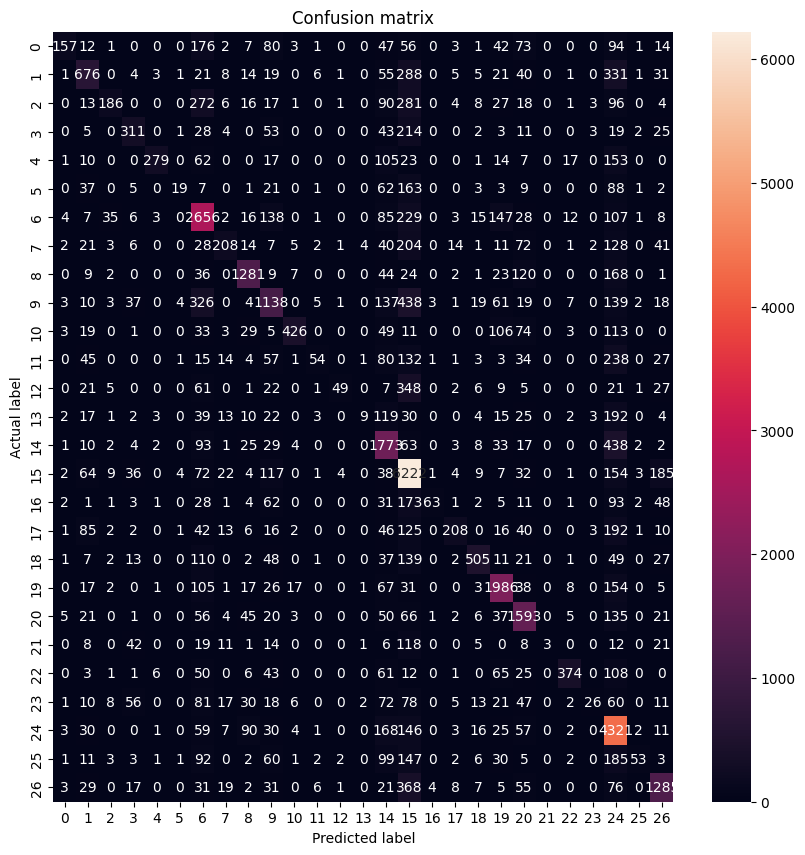

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
incorrect_predictions = cm.sum(axis=1) - np.diag(cm)

# Find the class with the most incorrect predictions
most_incorrect_class = np.argmax(incorrect_predictions)

print(f"The category that was predicted most incorrectly is: {label_encoder.inverse_transform([most_incorrect_class])[0]}")

The category that was predicted most incorrectly is: GROUPS VOICES


In [ ]:
# Calculates the metrics
print(f"Accuracy: {sklearn.metrics.accuracy_score(y_test, y_pred)}")  # Prints the accuracy of the model
print(f"Precision: {sklearn.metrics.precision_score(y_test, y_pred, average='macro')}")
print(f"Recall: {sklearn.metrics.recall_score(y_test, y_pred, average='macro')}")
print(f"F1-score: {sklearn.metrics.f1_score(y_test, y_pred, average='macro')}")

Accuracy: 0.6171634489177386
Precision: 0.6991996378969687
Recall: 0.400283836997841
F1-score: 0.4329364407080526
